In [18]:
import pandas as pd
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot as plt

In [19]:
#rea din csv
ufo_data = pd.read_csv("scrubbed.csv")
ufo_data.head()

C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [20]:
#US only
ufo_usa=ufo_data[ufo_data.country.eq("us")]
ufo_usa.head()
ufo_usa.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6528,-97.477778


In [21]:
#broken out by datetime 
ufo_usa[['Month', 'Day', 'Time']]= ufo_usa['datetime'].str.split('/',expand=True)


ufo_usa['Year']= ufo_usa['Time'].str[0:4]
ufo_usa['Time']= ufo_usa['Time'].str[5:10]
ufo_usa.head()

C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jocel\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Month,Day,Time,Year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10,10,20:30,1949
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10,10,21:00,1956
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10,10,20:00,1960
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,10,10,19:00,1961
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,10,10,23:45,1965


In [22]:
# frequncy of shape

ufo_usa['shape'].value_counts()

light        13473
triangle      6549
circle        6118
fireball      5148
unknown       4567
other         4466
sphere        4347
disk          4121
oval          3032
formation     1990
cigar         1643
changing      1584
rectangle     1070
flash         1062
cylinder      1027
diamond        928
chevron        815
teardrop       592
egg            581
cone           247
cross          188
delta            6
round            2
changed          1
flare            1
crescent         1
pyramid          1
hexagon          1
Name: shape, dtype: int64

In [23]:

#find total count of each shape
shape_df = ufo_usa['shape'].value_counts().rename_axis('UFO Shape').reset_index(name="Counts")

shape_df

,UFO Shape,Counts
0,light,13473
1,triangle,6549
2,circle,6118
3,fireball,5148
4,unknown,4567
5,other,4466
6,sphere,4347
7,disk,4121
8,oval,3032
9,formation,1990


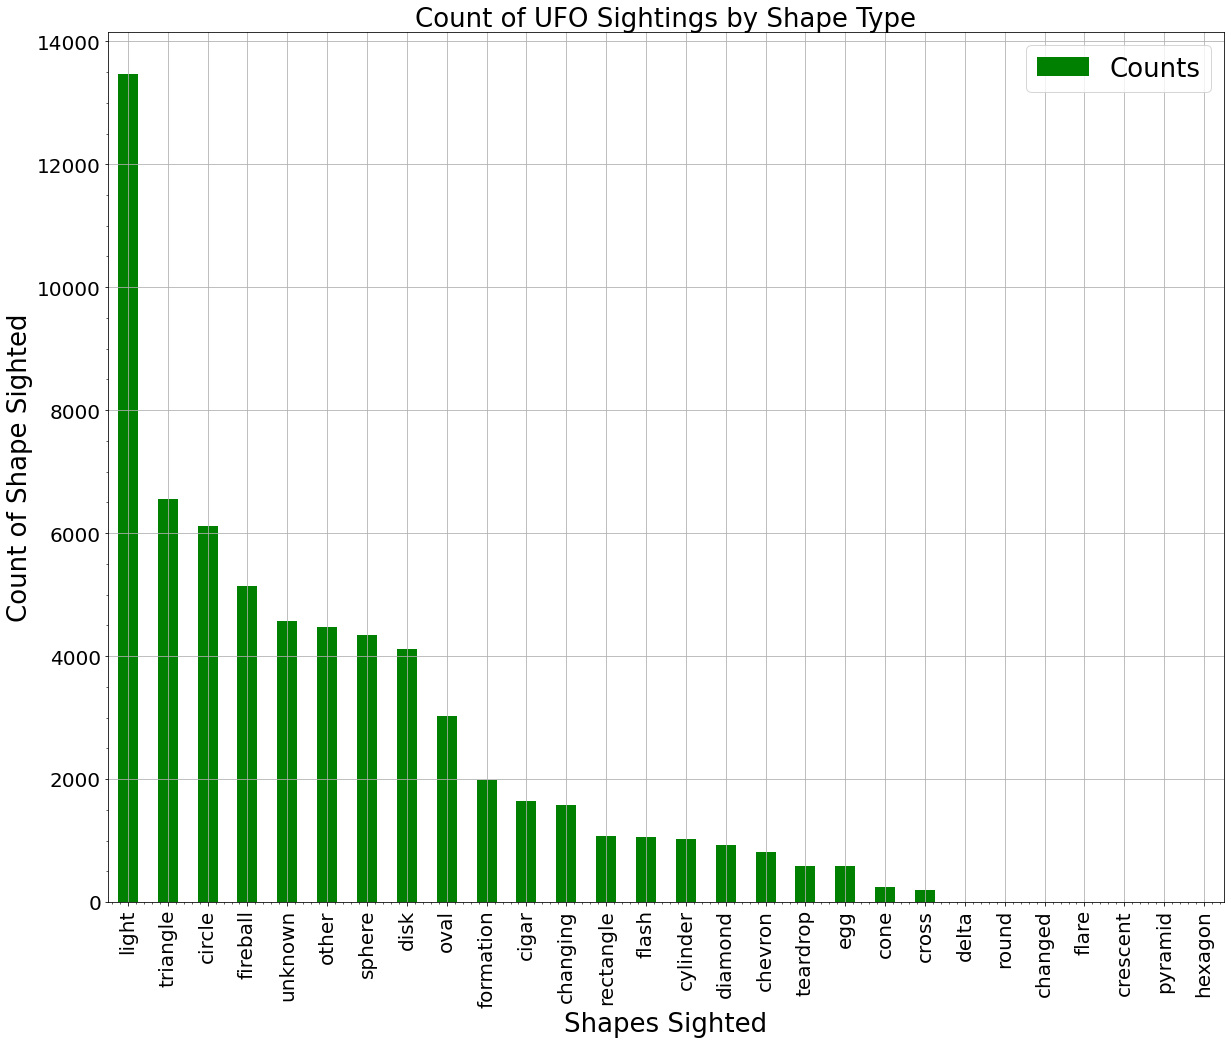

In [24]:
shape_df.plot(kind='bar', color='g', figsize=(20,16), fontsize=20)

plt.xlabel("Shapes Sighted", fontsize=26)
plt.ylabel("Count of Shape Sighted", fontsize=26)
plt.title("Count of UFO Sightings by Shape Type", fontsize=26)

plt.minorticks_on()
plt.grid()
plt.legend(fontsize=26)
x_indexes = np.arange(len(shape_df))
plt.xticks(ticks=x_indexes, labels=shape_df["UFO Shape"])
#plt.savefig("Count of UFO Sigthings by Shape Type2.png")
plt.show()